In [1]:
import nltk
import pandas as pd
import pickle

pd.set_option("display.max_columns", None)
from collections import Counter
import spacy
import google_conf
import math
import matplotlib
import matplotlib.pyplot as plt
import json

In [2]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [3]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [4]:
article_id = 1203  # id for "Paul the Cosmopolitan?"
with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    unigrams_lemmata = [el.strip() for el in f.readlines()]

In [5]:
nltk.FreqDist(unigrams_lemmata).most_common(20)

[('cosmopolitan', 89),
 ('Paul', 78),
 ('cosmopolitanism', 71),
 ('cynic', 41),
 ('vision', 33),
 ('people', 33),
 ('social', 33),
 ('human', 31),
 ('new', 30),
 ('think', 29),
 ('view', 26),
 ('see', 25),
 ('Pauls', 25),
 ('cor', 24),
 ('world', 23),
 ('God', 23),
 ('group', 21),
 ('jewish', 20),
 ('western', 19),
 ('Rom', 19)]

In [6]:
with open("../data/large_files/trigrams_lemmatized/trigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    trigrams_lemmata = [el.strip() for el in f.readlines()]
nltk.FreqDist(trigrams_lemmata).most_common(20)

[('Paul Cosmopolitan', 12),
 ('civic life', 9),
 ('religious group', 8),
 ('greek Roman', 7),
 ('Delanty Cosmopolitan Imagination', 7),
 ('high loyalty', 6),
 ('apocalyptic vision', 6),
 ('God Israel', 5),
 ('take place', 5),
 ('apostle Paul', 5),
 ('Pauls theology', 5),
 ('Pauls letter', 5),
 ('family friend', 5),
 ('social environment', 4),
 ('civic deity', 4),
 ('various way', 4),
 ('Pauls view', 4),
 ('cynic Paul', 4),
 ('point see', 4),
 ('jewish sectarian', 4)]

In [7]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]

In [8]:
metadata_df["wordCount"].sum()

232665684

In [9]:
def freqs_from_ids(ids):
    metadata_subset = metadata_df[metadata_df["id_kase"].isin(ids)]
    wordcount = metadata_subset["wordCount"].sum()
    unigrams_lemmata = []
    for id in ids:
        with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(id)), "r") as f:
            unigrams_lemmata.extend([el.strip() for el in f.readlines()])
    unigrams_lemmata_counts = nltk.FreqDist(unigrams_lemmata)
    unigrams_lemmata_freqs = [(tup[0], tup[1] / wordcount) for tup in unigrams_lemmata_counts.most_common()]
    return unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount


In [10]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]
len(ids)

425

In [11]:
ids = metadata_df[metadata_df["decade"]==1930].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]


[('et', 0.0036281792407639574),
 ('church', 0.002545608176505687),
 ('new', 0.002450109670484315),
 ('cf', 0.0022331370648037583),
 ('God', 0.0020994391563738377),
 ('man', 0.00205436386153175),
 ('rev', 0.0019519894630768396),
 ('time', 0.001848087088525587),
 ('st', 0.0018022478056353287),
 ('make', 0.001790023996864593),
 ('Paul', 0.0017487686422633605),
 ('see', 0.0017250850127700603),
 ('work', 0.001706749299613957),
 ('die', 0.0016777177537834597),
 ('life', 0.0016303504947968593),
 ('say', 0.0015615915704614717),
 ('der', 0.0015463118094980522),
 ('give', 0.0015081124070895034),
 ('christian', 0.0014813728254035193),
 ('year', 0.0014080299727791058)]

In [12]:
ids = metadata_df[metadata_df["decade"]==1990].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]

[('see', 0.0026282964056011165),
 ('new', 0.002373974651073755),
 ('God', 0.0020707096811967028),
 ('Paul', 0.0017967191578839516),
 ('christian', 0.0017665298848645165),
 ('group', 0.0016457727927867763),
 ('church', 0.0015693847837830544),
 ('book', 0.0014211828980512824),
 ('make', 0.0013864194927561753),
 ('use', 0.0013745267488394282),
 ('work', 0.0012894478885119296),
 ('press', 0.0012523974170789865),
 ('study', 0.0012249526234249547),
 ('Jesus', 0.001188359565219579),
 ('selection', 0.0011522239202417703),
 ('university', 0.0011435330689179937),
 ('world', 0.0011009936387542441),
 ('history', 0.001100536225526677),
 ('human', 0.0010973343329337066),
 ('way', 0.0010858990022445268)]

In [13]:
decades_sample_freqs = []
sample_size = 500
for decade in range(1900, 2020, 10):
    ids = metadata_df[metadata_df["decade"]==decade].sample(sample_size, replace=True)["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    decades_freqs_dict = dict(unigrams_lemmata_freqs)
    decades_sample_freqs.append({"decade" : decade, "freqs" : decades_freqs_dict})

In [14]:
decades_sample_freqs

[{'decade': 1900,
  'freqs': {'et': 0.0037223085540818907,
   'new': 0.0033723056085125467,
   'man': 0.0032064626286458847,
   'God': 0.0029000244061459924,
   'der': 0.0028421031266104716,
   'see': 0.0027465577680604245,
   'life': 0.0026396261750717704,
   'Paul': 0.002634180584688089,
   'Jesus': 0.002610913062139632,
   'die': 0.0024346739551768504,
   'make': 0.0024222976133957564,
   'book': 0.0023619010655040167,
   'Christ': 0.0022361574330080998,
   'say': 0.002220315715528299,
   'time': 0.0021361565914168584,
   'church': 0.0021148692835533766,
   'ii': 0.0020633837017440247,
   'give': 0.0020208090860170604,
   'testament': 0.0020064525295509913,
   'work': 0.0019757592019338777,
   'gospel': 0.0019227884591107944,
   'christian': 0.0018792237360413429,
   'st': 0.001761400962285326,
   'und': 0.001759420747600351,
   'great': 0.0017183312928871184,
   'word': 0.0016841725895712983,
   'find': 0.0016802121602013482,
   'proc': 0.001631696900419459,
   'think': 0.001609914

In [15]:
keyterms = ["Paul", "apostle", "saint", "social", "soul", "theology", "science", "group", "church", "community", "gender", "psychology", "sociology", "anthropology", "jewish", "judaism"]
keywords_freqs = []
for decade_data in decades_sample_freqs:
    decade_vals = {}
    for word in keyterms:
        try:
            decade_vals[word] = decade_data["freqs"][word]
        except:
            decade_vals[word] = 0
    keywords_freqs.append(decade_vals)

In [16]:
keywords_freqs

[{'Paul': 0.002634180584688089,
  'apostle': 0.0007470359899068458,
  'saint': 0.0005079250666961059,
  'social': 0.0002925767197050668,
  'soul': 0.00047228120236655457,
  'theology': 0.0007643628684003776,
  'science': 0.0005158459254360062,
  'group': 0.00020693243457989497,
  'church': 0.0021148692835533766,
  'community': 0.00017475394594905006,
  'gender': 3.9604293699501435e-06,
  'psychology': 7.079267498785882e-05,
  'sociology': 2.4752683562188396e-05,
  'anthropology': 8.910966082387822e-06,
  'jewish': 0.0008099078061548043,
  'judaism': 0.0002465367282793964},
 {'Paul': 0.0030367329366360685,
  'apostle': 0.000919594881493493,
  'saint': 0.0003826224362226945,
  'social': 0.0008184690134964594,
  'soul': 0.0005689069299014407,
  'theology': 0.0009101328119733027,
  'science': 0.0004648241651793476,
  'group': 0.0003867620916377778,
  'church': 0.002942112241434166,
  'community': 0.0004985327878450255,
  'gender': 5.3224141051070335e-06,
  'psychology': 0.00010408276472209

In [17]:
keywords_freqs_df = pd.DataFrame(keywords_freqs, index=range(1900, 2020, 10))
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish,judaism
1900,0.002634,0.000747,0.000508,0.000293,0.000472,0.000764,0.000516,0.000207,0.002115,0.000175,0.000004,0.000071,0.000025,0.000009,0.000810,0.000247
1910,0.003037,0.000920,0.000383,0.000818,0.000569,0.000910,0.000465,0.000387,0.002942,0.000499,0.000005,0.000104,0.000090,0.000004,0.000976,0.000284
1920,0.002993,0.000376,0.000371,0.000721,0.000457,0.000775,0.001033,0.000562,0.002069,0.000312,0.000004,0.000211,0.000043,0.000030,0.000823,0.000271
1930,0.001874,0.000258,0.000557,0.000898,0.000340,0.000375,0.000434,0.000483,0.002418,0.000286,0.000001,0.000127,0.000024,0.000035,0.000479,0.000245
1940,0.002263,0.000350,0.000350,0.000588,0.000370,0.000373,0.000229,0.000603,0.002536,0.000270,0.000005,0.000066,0.000052,0.000023,0.000507,0.000244
1950,0.002051,0.000303,0.000384,0.000284,0.000295,0.000561,0.000195,0.000337,0.002155,0.000294,0.000002,0.000045,0.000023,0.000031,0.000308,0.000099
1960,0.001689,0.000180,0.000419,0.000303,0.000255,0.000605,0.000323,0.000224,0.002000,0.000308,0.000004,0.000043,0.000016,0.000026,0.000317,0.000118
1970,0.002361,0.000260,0.000362,0.000472,0.000442,0.000776,0.000185,0.000404,0.002251,0.000380,0.000003,0.000059,0.000042,0.000036,0.000487,0.000214
1980,0.002209,0.000196,0.000217,0.000781,0.000217,0.000827,0.000280,0.000402,0.002222,0.000680,0.000022,0.000067,0.000049,0.000056,0.000629,0.000280
1990,0.002536,0.000210,0.000229,0.001007,0.000190,0.000757,0.000437,0.001489,0.001451,0.000629,0.000207,0.000110,0.000029,0.000092,0.000670,0.000320


In [18]:
"Paul", "church",

('Paul', 'church')

In [19]:
4 / 1000

0.004

<Axes: >

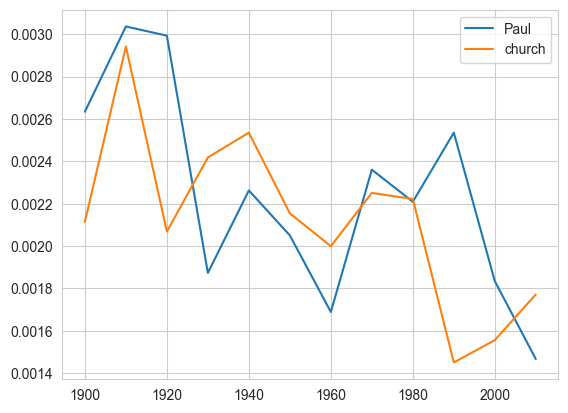

In [20]:
keywords_freqs_df[["Paul", "church"]].plot()

<Axes: >

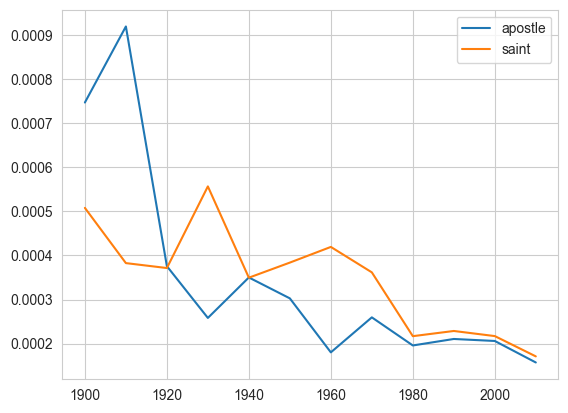

In [21]:
keywords_freqs_df[["apostle", "saint"]].plot()

<Axes: >

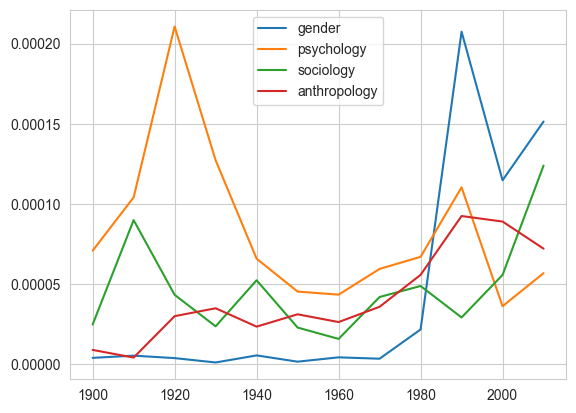

In [22]:
keywords_freqs_df[["gender", "psychology", "sociology", "anthropology"]].plot()

<Axes: >

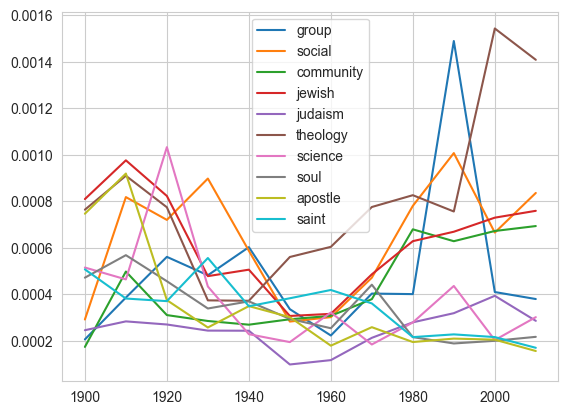

In [23]:
keywords_freqs_df[["group", "social", "community", "jewish", "judaism","theology", "science", "soul", "apostle", "saint"]].plot()

In [24]:
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish,judaism
1900,0.002634,0.000747,0.000508,0.000293,0.000472,0.000764,0.000516,0.000207,0.002115,0.000175,0.000004,0.000071,0.000025,0.000009,0.000810,0.000247
1910,0.003037,0.000920,0.000383,0.000818,0.000569,0.000910,0.000465,0.000387,0.002942,0.000499,0.000005,0.000104,0.000090,0.000004,0.000976,0.000284
1920,0.002993,0.000376,0.000371,0.000721,0.000457,0.000775,0.001033,0.000562,0.002069,0.000312,0.000004,0.000211,0.000043,0.000030,0.000823,0.000271
1930,0.001874,0.000258,0.000557,0.000898,0.000340,0.000375,0.000434,0.000483,0.002418,0.000286,0.000001,0.000127,0.000024,0.000035,0.000479,0.000245
1940,0.002263,0.000350,0.000350,0.000588,0.000370,0.000373,0.000229,0.000603,0.002536,0.000270,0.000005,0.000066,0.000052,0.000023,0.000507,0.000244
1950,0.002051,0.000303,0.000384,0.000284,0.000295,0.000561,0.000195,0.000337,0.002155,0.000294,0.000002,0.000045,0.000023,0.000031,0.000308,0.000099
1960,0.001689,0.000180,0.000419,0.000303,0.000255,0.000605,0.000323,0.000224,0.002000,0.000308,0.000004,0.000043,0.000016,0.000026,0.000317,0.000118
1970,0.002361,0.000260,0.000362,0.000472,0.000442,0.000776,0.000185,0.000404,0.002251,0.000380,0.000003,0.000059,0.000042,0.000036,0.000487,0.000214
1980,0.002209,0.000196,0.000217,0.000781,0.000217,0.000827,0.000280,0.000402,0.002222,0.000680,0.000022,0.000067,0.000049,0.000056,0.000629,0.000280
1990,0.002536,0.000210,0.000229,0.001007,0.000190,0.000757,0.000437,0.001489,0.001451,0.000629,0.000207,0.000110,0.000029,0.000092,0.000670,0.000320


# Bidecades overviews

In [34]:
bidecades_strs = sorted([el for el in list(set(metadata_df["bidecade"])) if el != None])
bidecades_strs

['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']

In [36]:
metadata_df.head()

,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,id_kase,docSubType,sourceCategory,abstract,subTitle,year,decade,bidecade
0,[Gerald F. Moede],1974-04-01,article,10.1111/j.1758-6623.1974.tb02427.x,ark://27927/phx7f872pd,"[{'name': 'doi', 'value': '10.1111/j.1758-6623...",The Ecumenical Review,2,"[church, church union, christian unity, confes...",[eng],"[unigram, bigram, trigram]",19,264,246,246-264,portico,1974,"John Wiley & Sons, Inc.",7.0,"[Philosophy - Applied philosophy, Political sc...",CHURCH UNION AS A MODEL OF CHRISTIAN UNITY,http://doi.org/10.1111/j.1758-6623.1974.tb02427.x,26,7827,0,None,None,None,None,1974,1970,1960-1979
1,[Ben C. Ollenburger],1987-10-01,article,10.1177/004057368704400307,ark://27927/phx6238nb98,"[{'name': 'doi', 'value': '10.1177/00405736870...",Theology Today,3,"[haarlem, miep gies, german, suffering, hollan...",[eng],"[unigram, bigram, trigram]",10,359,350,pp. 350-359,portico,1987,SAGE Publications,7.0,[Philosophy - Applied philosophy],Suffering and Hope: The Story Behind the Book,http://doi.org/10.1177/004057368704400307,44,5181,1,None,None,None,None,1987,1980,1980-1999
2,[Eric L. Johnson],1997-03-01,article,10.1177/009164719702500102,ark://27927/phz2f6c9d3v,"[{'name': 'doi', 'value': '10.1177/00916471970...",Journal of Psychology and Theology,1,"[kingdom, christian, creation, lordship, knowl...",[eng],"[unigram, bigram, trigram]",17,27,11,pp. 11-27,portico,1997,SAGE Publications,2.0,[Philosophy - Metaphysics],"Christ, the Lord of Psychology",http://doi.org/10.1177/009164719702500102,25,13697,2,None,None,None,None,1997,1990,1980-1999
3,"[Kimberly Matheson, Hymie Anisman, Renate Ysse...",2010-02-01,article,10.1177/1088868309349693,ark://27927/pgfvbkcxrg,"[{'name': 'doi', 'value': '10.1177/10888683093...",Personality and Social Psychology Review,1,"[religious, identity, religious identity, soci...",[eng],"[unigram, bigram, trigram]",12,71,60,60-71,portico,2010,SAGE Publications,6.0,"[Social sciences - Psychology, Social sciences...",Religiosity as Identity: Toward an Understandi...,http://doi.org/10.1177/1088868309349693,14,9915,3,None,None,None,None,2010,2010,2000-2019
4,[David J. Clark],1975-01-01,article,10.1177/026009357502600107,ark://27927/phx5181bbsv,"[{'name': 'doi', 'value': '10.1177/02600935750...",The Bible Translator (1950-2012),1,"[haenchen, overboard, barclay, apostles, went ...",[eng],"[unigram, bigram, trigram]",3,146,144,pp. 144-146,portico,1975,SAGE Publications,7.0,"[Linguistics - Grammar, Religion - Spiritual b...",What Went Overboard First?,http://doi.org/10.1177/026009357502600107,26,1652,4,None,None,None,None,1975,1970,1960-1979


# Building vocabularies

In [25]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = [tup[0] for tup in unigrams_lemmata_counts.most_common()][:N]
    bidecades_vocabs.append(bidecade_vocab_N)

In [26]:
vocabulary = list(set([w for vocab in bidecades_vocabs for w in vocab]))
len(vocabulary)

4804

In [27]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs_counts = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = dict(unigrams_lemmata_counts.most_common()[:N])
    bidecades_vocabs_counts.append(bidecade_vocab_N)

In [28]:
bidecades_strs = sorted([el for el in list(set(metadata_df["bidecade"])) if el != None])
bidecades_vocabs_counts_df = pd.DataFrame(bidecades_vocabs_counts).T
bidecades_vocabs_counts_df.columns = bidecades_strs

In [29]:
bidecades_vocabs_counts_df.shape

(4804, 6)

In [30]:
bidecades_vocabs_counts_df.head(10)

,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019
man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0
new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0
Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0
et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0
God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0
Paul,8660.0,7217.0,19803.0,36061.0,100083.0,224979.0
make,8094.0,8035.0,18269.0,27811.0,63486.0,206015.0
church,8091.0,7319.0,23104.0,39397.0,74688.0,214495.0
life,7543.0,6423.0,15075.0,22026.0,49869.0,148808.0
see,7388.0,6783.0,18801.0,34552.0,97771.0,233655.0


In [40]:
bidecades_vocabs_counts_df

,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019
man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0
new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0
Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0
et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0
God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0
...,...,...,...,...,...,...
Ian,NaN,NaN,NaN,NaN,NaN,3254.0
gesture,NaN,NaN,NaN,NaN,NaN,3249.0
metaphorical,NaN,NaN,NaN,NaN,NaN,3247.0
layer,NaN,NaN,NaN,NaN,NaN,3245.0


In [31]:
len(bidecades_vocabs)

6

In [32]:
shared_vocabulary = list((set(bidecades_vocabs[0])
                          & set(bidecades_vocabs[1])
                          & set(bidecades_vocabs[2])
                          & set(bidecades_vocabs[3])
                          & set(bidecades_vocabs[4])
                          & set(bidecades_vocabs[5])))
len(shared_vocabulary)

1868

In [158]:
pickle.dump(bidecades_vocabs_counts_df, open("../data/bidecades_vocabs_counts_df.pickle", "wb"))
pickle.dump(vocabulary, open("../data/vocabulary.pickle", "wb"))
pickle.dump(shared_vocabulary, open("../data/shared_vocabulary.pickle", "wb"))
pickle.dump(bidecades_vocabs, open("../data/bidecades_vocabs.pickle", "wb"))

# Adding frequencies to bidecade data

In [41]:
bidecades_vocabs_counts_df.fillna(0, inplace=True)


In [42]:
bidecade_wordcounts = {}
for bidecade in bidecades_strs:
    bidecade_wordcounts[bidecade] = metadata_df[metadata_df["bidecade"]==bidecade]["wordCount"].sum()
bidecade_wordcounts

{'1900-1919': 5178524,
 '1920-1939': 5481199,
 '1940-1959': 11965635,
 '1960-1979': 19721863,
 '1980-1999': 46442633,
 '2000-2019': 139359545}

In [43]:
for bidecade in bidecades_strs:
    bidecades_vocabs_counts_df[bidecade + "_freq"] = bidecades_vocabs_counts_df[bidecade].apply(lambda x: x / bidecade_wordcounts[bidecade])

In [44]:
bidecades_vocabs_counts_df.reset_index(inplace=True)
bidecades_vocabs_counts_df.head(100)

,index,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019,1900-1919_freq,1920-1939_freq,1940-1959_freq,1960-1979_freq,1980-1999_freq,2000-2019_freq
0,man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0,0.002166,0.001522,0.002015,0.001988,0.001043,0.000722
1,new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0,0.001966,0.001859,0.001961,0.002134,0.002098,0.002106
2,Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0,0.001863,0.000896,0.001014,0.001187,0.001072,0.001548
3,et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0,0.001801,0.002156,0.001739,0.001824,0.001062,0.000527
4,God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0,0.001786,0.001145,0.002200,0.002320,0.002143,0.002104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,apostle,2454.0,943.0,3288.0,4801.0,9336.0,21883.0,0.000474,0.000172,0.000275,0.000243,0.000201,0.000157
96,epistle,2431.0,1618.0,4003.0,4925.0,8343.0,18161.0,0.000469,0.000295,0.000335,0.000250,0.000180,0.000130
97,century,2427.0,3062.0,7516.0,10538.0,27068.0,96298.0,0.000469,0.000559,0.000628,0.000534,0.000583,0.000691
98,live,2427.0,2239.0,6810.0,9567.0,23213.0,77744.0,0.000469,0.000408,0.000569,0.000485,0.000500,0.000558


In [49]:
bidecades_vocabs_counts_df.columns

Index(['index', '1900-1919', '1920-1939', '1940-1959', '1960-1979',
       '1980-1999', '2000-2019', '1900-1919_freq', '1920-1939_freq',
       '1940-1959_freq', '1960-1979_freq', '1980-1999_freq', '2000-2019_freq'],
      dtype='object')

In [50]:
freq_cols = ['1900-1919_freq', '1920-1939_freq', '1940-1959_freq', '1960-1979_freq', '1980-1999_freq', '2000-2019_freq']

In [78]:
def plot_bidecade_freq(term, ax=None):
    if ax == None:
        fig, ax = plt.subplots()
    data = bidecades_vocabs_counts_df[bidecades_vocabs_counts_df["index"]==term][freq_cols].values[0]
    layer = ax.plot(data, color="black", linewidth=2)
    ax.set_title(term, pad=-14)
    ax.set_xticks(range(0,6))
    ax.set_xticklabels(bidecades_strs, rotation=90)
    ax.set_xlabel("bidecade")
    ax.set_ylabel("freq")
    return layer

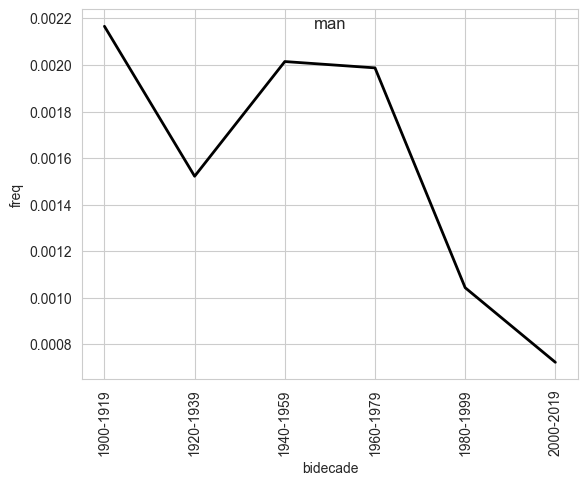

In [79]:
plot_bidecade_freq("man")

In [68]:
bidecades_strs

['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']

In [91]:
jewishness = ["jewish", "Jews", "law", "scripture", "judaism", "Israel", "prophet", "Jew", "hebrew", "Pharisees", "rabbinic", "Torah", "Benjamin", "rabbi", "circumcision", "Sabbath", "Talmud", "Israelites", "antisemitism", "Mosaic", "Passover", "nazi", "Jerusalem", "Rabbi", "Holocaust", "mosaic", "judaism", "Moses", "Abraham", "Hebrews", "Juden"]
len(jewishness)


31

In [92]:
6*5

30

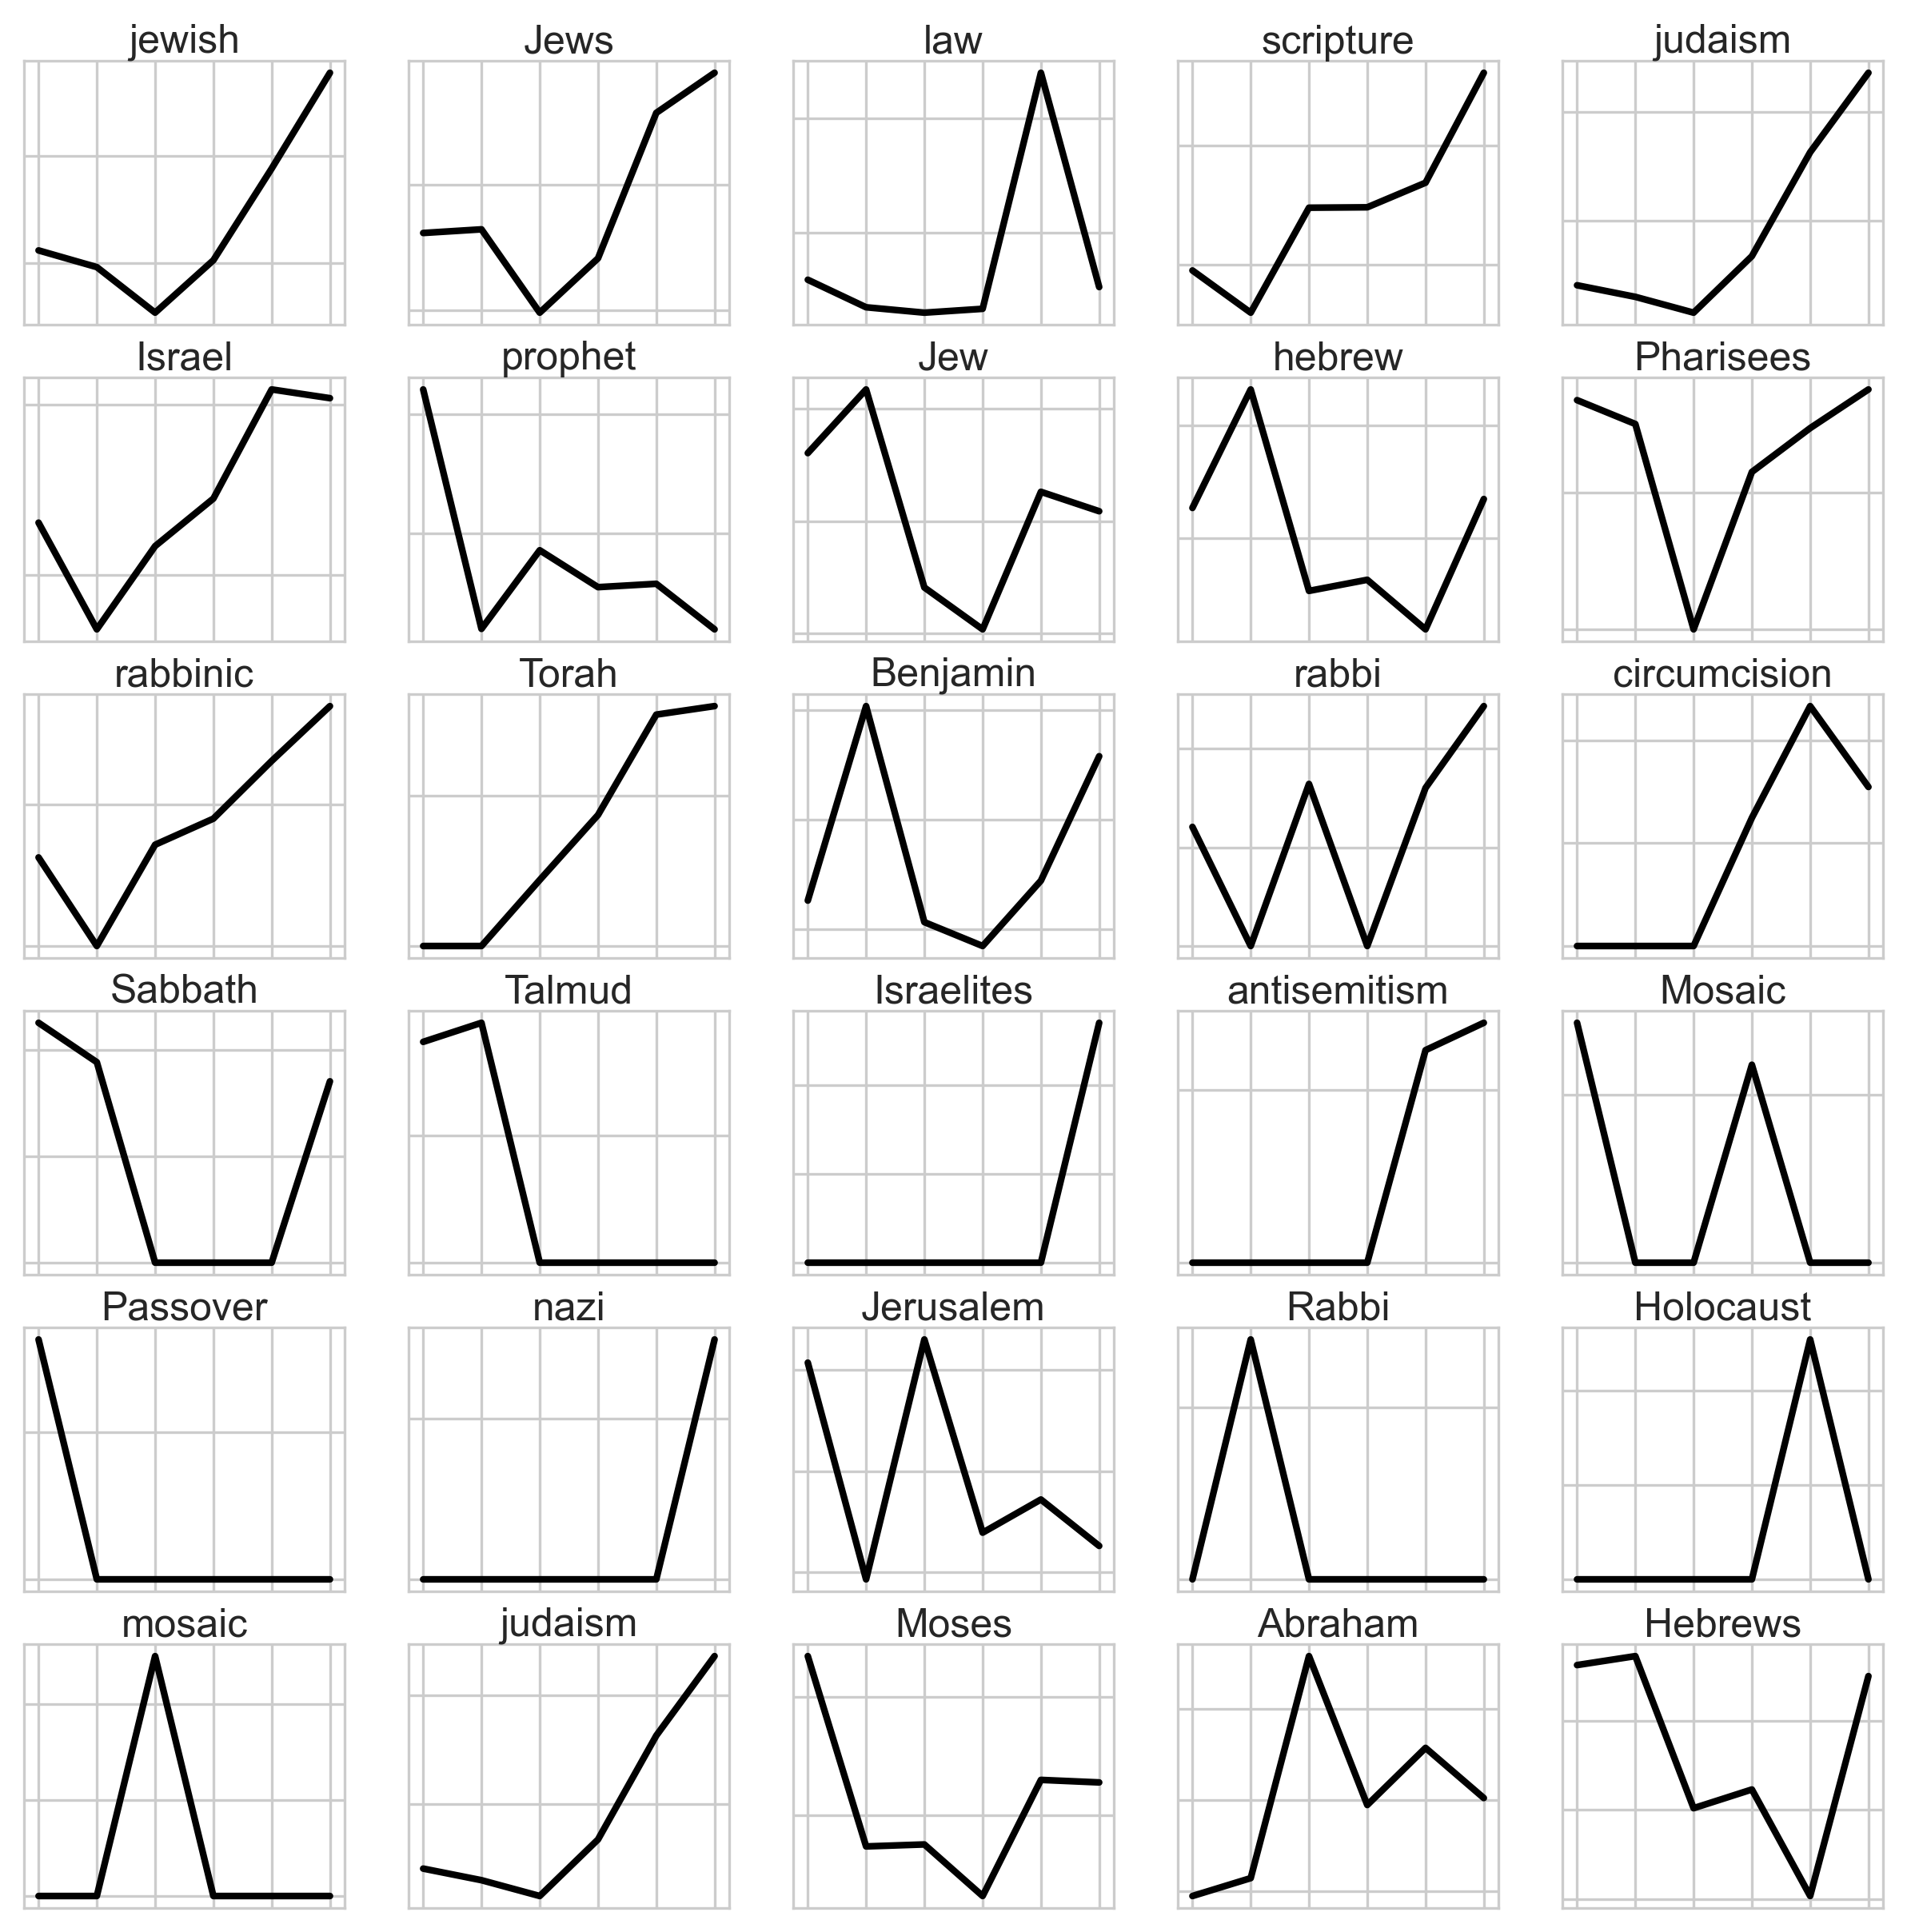

In [104]:
keyterms = jewishness
fig, axs = plt.subplots(6,5, figsize=(10,10), dpi=300)
for ax, term in zip(axs.ravel(), keyterms[:len(axs.ravel())]):
    plot_bidecade_freq(term, ax=ax)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])


In [100]:
doctrinal = ["doctrine", "Spirit", "canon", "sermon", "minister", "conversion", "pastoral", "confession", "pastor", "orthodox", "trinity", "ecclesiastical", "christology", "sacrament", "communion", "incarnation", "canonical", "ecumenical", "eucharist", "dogmatic", "Virgin", "dogma", "doctrinal", "christological", "christentum", "evangelism", "trinitarian", "sacramental", "virgin", "catechism", "Christendom", "ecclesial", "Sundayschool", "prechristian", "Absolute", "doctrina", "superstition"]
len(doctrinal)


37

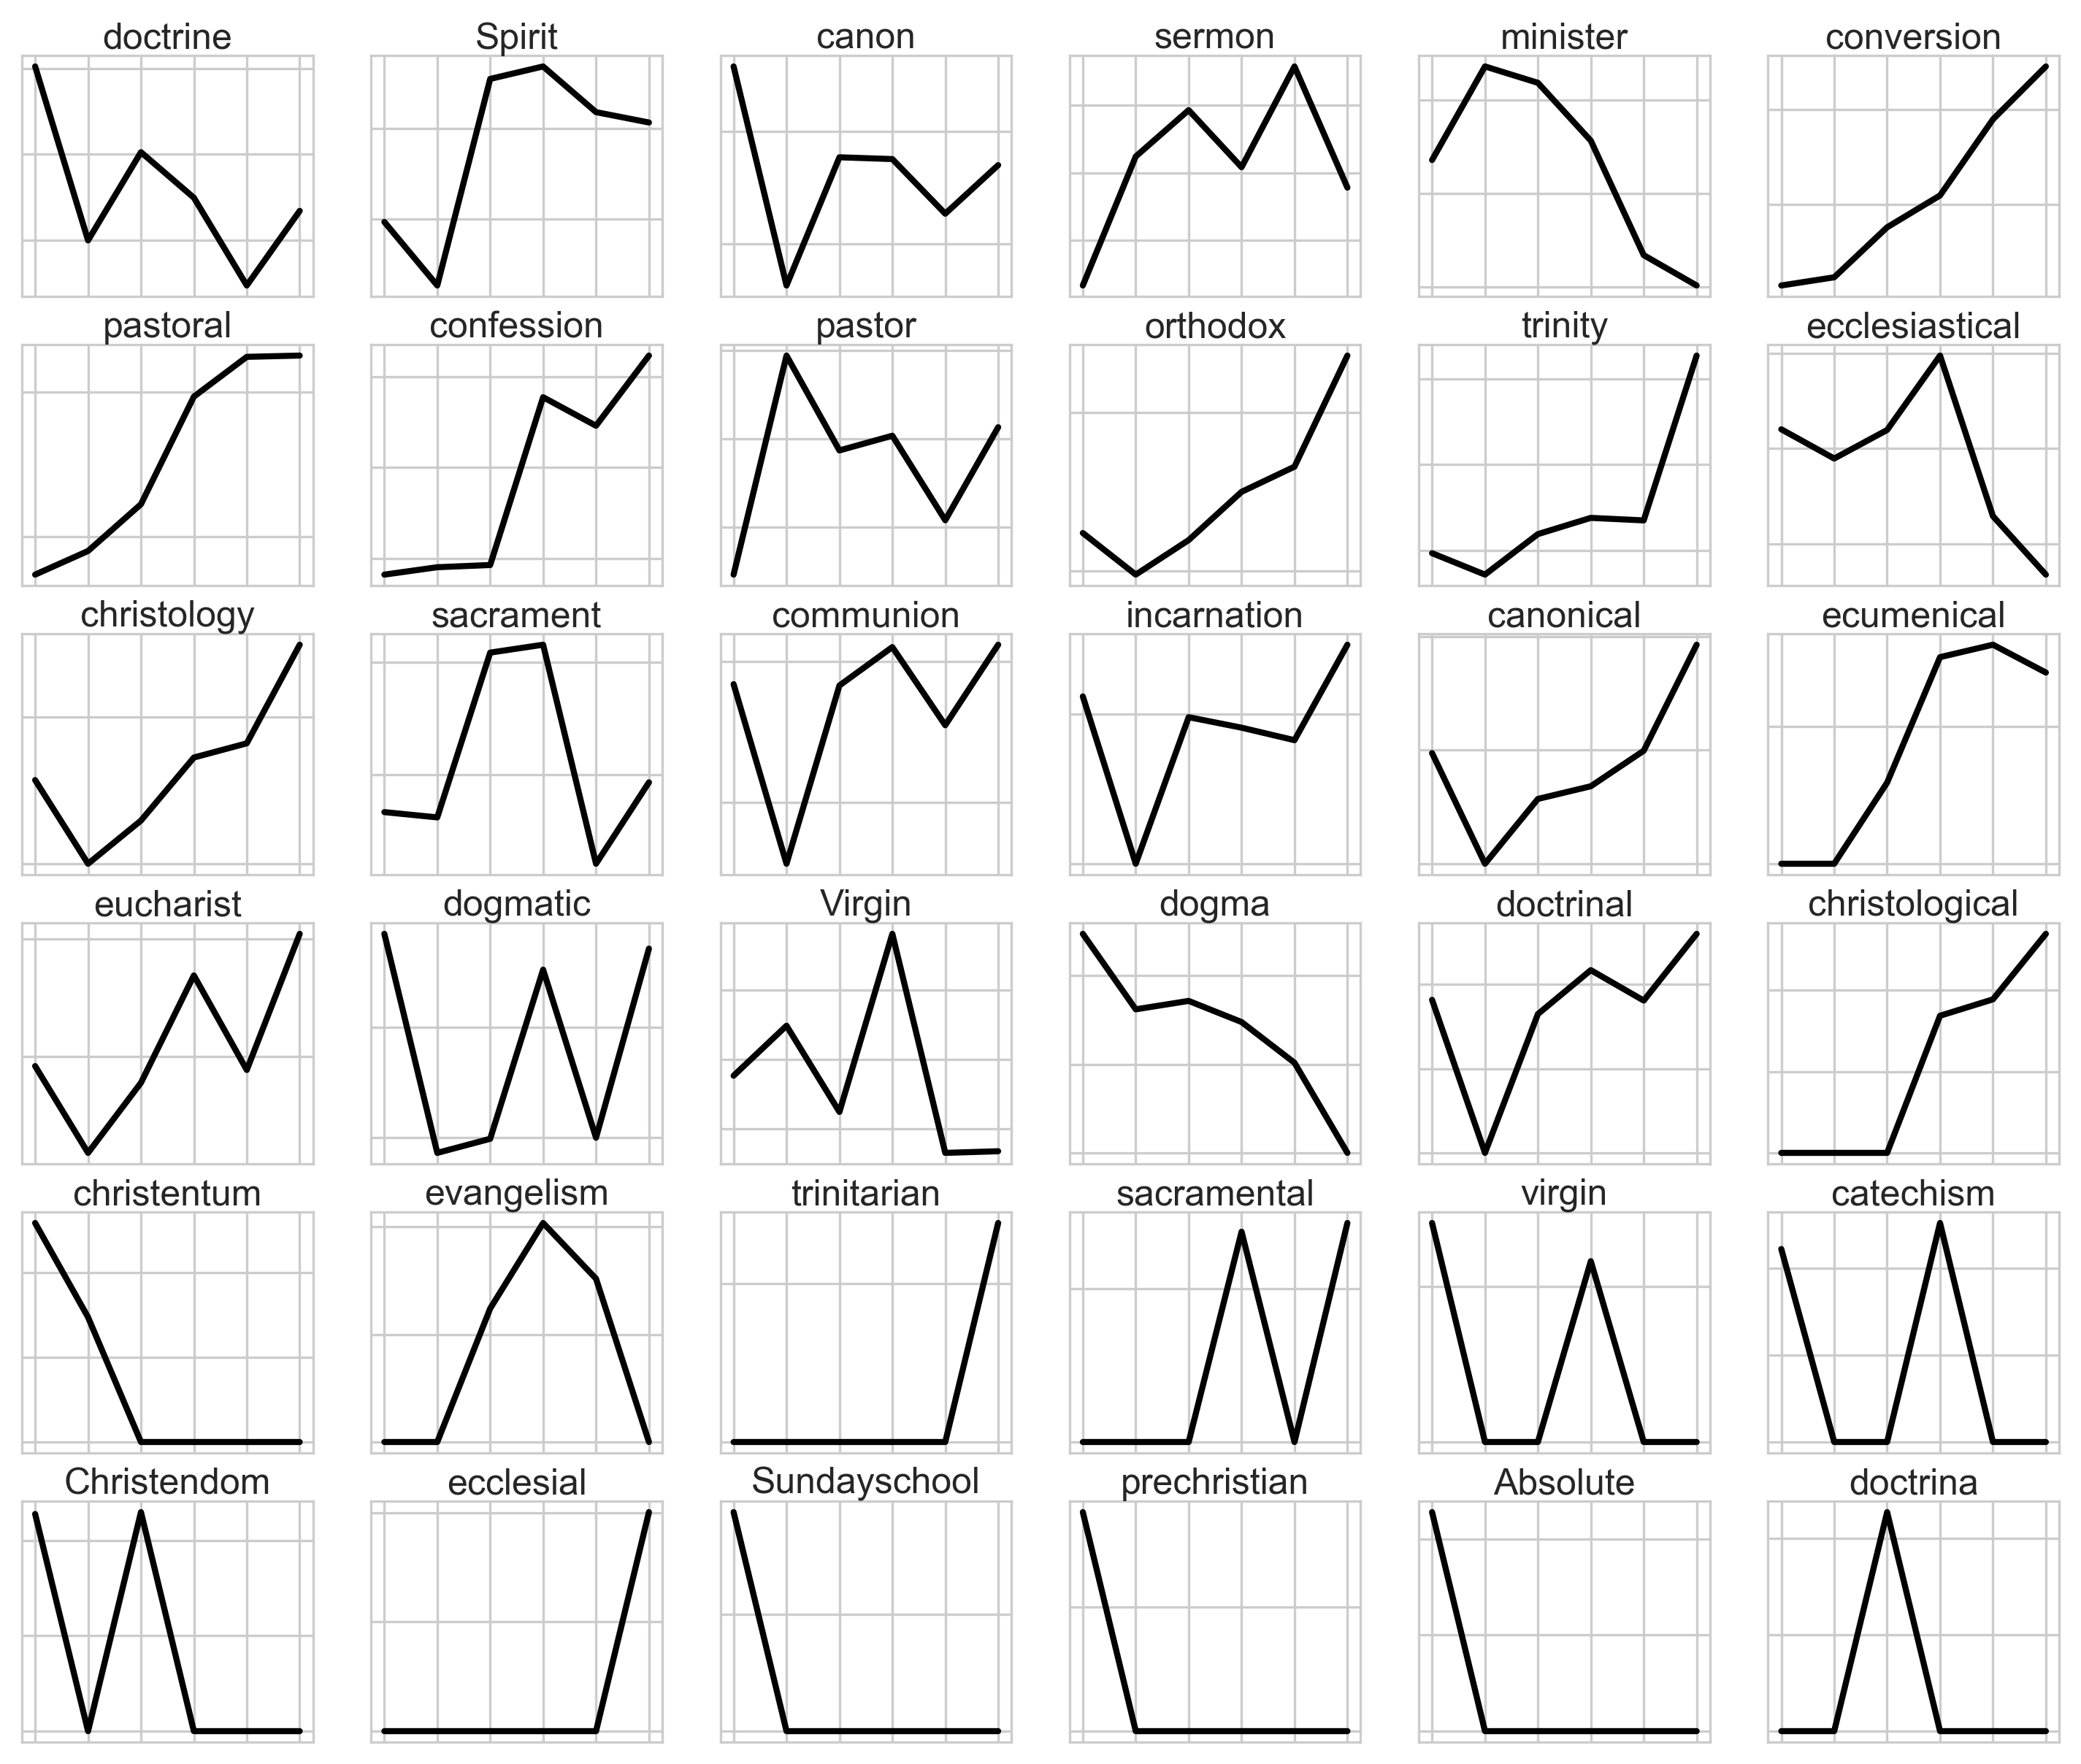

In [103]:
keyterms = doctrinal
fig, axs = plt.subplots(6,6, figsize=(12,10), dpi=300)
for ax, term in zip(axs.ravel(), keyterms[:len(axs.ravel())]):
    plot_bidecade_freq(term, ax=ax)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])


In [105]:
theology = ["theology", "theological", "theologian", "theologie", "religion", "religious", "christian", "christianity", "chrétienne"]

In [106]:
denominational = ["catholic", "Luther", "protestant", "secular", "Pope", "evangelical", "clergy", "Vatican", "monastery", "catholicism", "presbyterian", "conservative", "monk", "episcopal", "lutheran", "protestantism", "methodist", "monastic", "Puritan", "jesuit", "scholastic", "Franciscan", "evangelicalism", "Melanchthon"]

In [107]:
ideological = ["ideology", "democracy", "liberation", "feminist", "humanist", "democratic", "global", "hierarchy", "resistance", "ethnic", "humanism", "negro", "ideological", "polemic", "industrial", "modernity", "soviet", "racial", "violent", "liberate", "institutional", "solidarity", "pluralism", "postmodern", "liberalism", "oppression", "antisemitism", "ethnicity", "immigrant", "nazi", "postcolonial", "propaganda", "nationalism", "idealism", "indigenous", "activist", "individualism", "Holocaust", "socialism", "marxist", "globalization", "imperialism", "suffrage", "fundamentalist", "ecology", "inequality", "identity", "violence"]

In [108]:
historicalcritical = ["historical", "tradition", "social", "society", "community", "theory", "evidence", "argument", "science", "method", "approach", "criticism", "analysis", "system", "critical", "research", "model", "perspective", "traditional", "identity", "compare", "scholarship", "discourse", "scientific", "historian", "survey", "pattern", "critique", "Geschichte", "synoptic", "observation", "category", "hypothesis", "logical", "academic", "objective", "systematic", "dispute", "exegetical", "criterion", "reconstruction", "identification", "analyze", "theoretical", "tool", "methodology", "experiment", "synthesis", "comparative", "subjective", "scientist", "paradigm", "empirical", "methodological", "conceptual", "normative", "technology", "mechanism", "network", "transmission", "contextual", "functional", "epistemology", "subjectivity", "historiography", "phenomenology", "ontology", "historicity", "Comparative", "statistic"]

In [109]:
literary = ["literature", "interpretation", "source", "language", "translation", "literary", "narrative", "manuscript", "translate", "interpret", "fragment", "papyrus", "codex", "metaphor", "interpreter", "authorship", "linguistic", "authentic", "genre", "terminology", "hermeneutic", "hermeneutical", "interpretive", "philological", "exegesis", "semantic", "exegete", "philology", "argumentation", "interpretative", "intertextuality", "intertextual", "interpolation"]

In [110]:
interdisciplinarity = ["economic", "international", "psychology", "psychological", "sociology", "economy", "archaeology", "anthropology", "archaeological", "sociological", "genetic", "cognitive", "behavioral", "biology", "biological", "brain", "anthropological", "interdisciplinary"]

In [111]:
scholars = ["Harnack", "Bultmann", "Sanders", "schweitzer", "Lightfoot", "Hegel", "Bauer", "Cullmann", "Porter", "Loisy", "Dibelius", "Bonhoeffer", "Betz", "tillich", "Agamben", "Holtzmann", "Goethe", "Mitchell", "Hayes,", "Derrida", "Toynbee", "Bauckham", "Dewey", "Lietzmann", "Westcott", "Kim", "Deissmann", "sartre", "Hooker", "Troeltsch", "Windisch", "Badiou,", "Rousseau", "Crossan", "Ricoeur", "Renan", "Conzelmann"]

In [112]:
sexgender = ["woman", "sexual", "sex", "gender", "sexuality", "women", "feminine", "masculinity", "gay"]

In [113]:
outsiders = ["gentile", "pagan", "enemy", "opponent", "heretic", "heathen"]